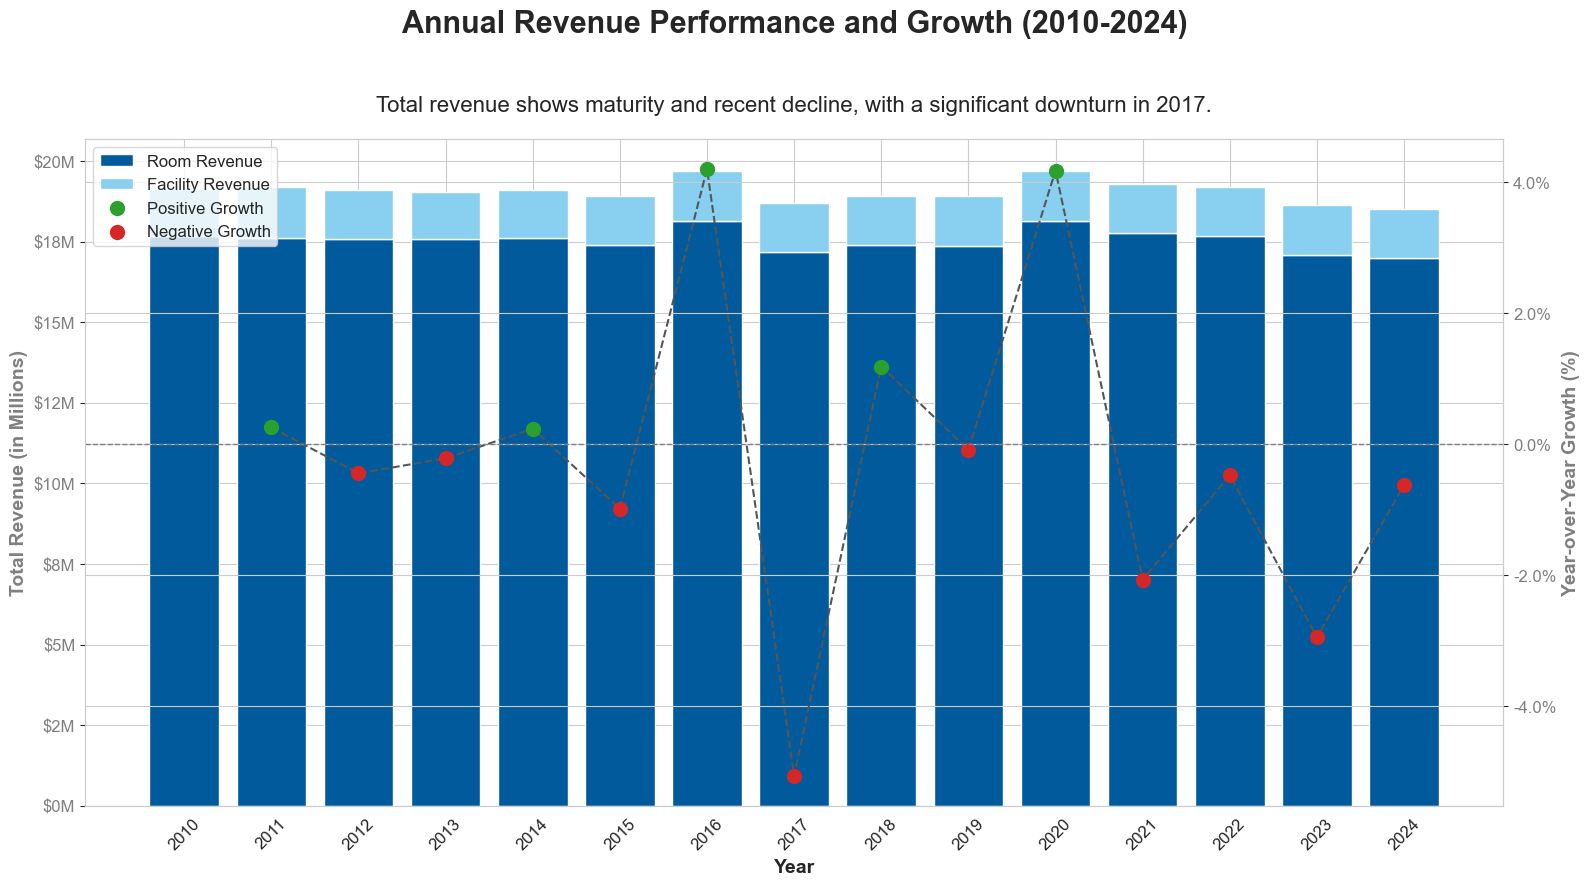

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# --- 1. Data Preparation ---
# Recreate the DataFrame directly from your SQL output.
# In a real scenario, this would come from a CSV or database connection.
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'Total Room Revenue': [17661250, 17610991, 17568563, 17567350, 17614171, 17407251, 18146407, 17167659, 17393714, 17354177, 18129866, 17766313, 17661953, 17100509, 16982589],
    'Total Facility Revenue': [1473249, 1571164, 1527046, 1487070, 1484167, 1502962, 1556404, 1537945, 1533139, 1555572, 1567581, 1523716, 1536402, 1532144, 1533357],
    'YoY Growth %': [None, 0.25, -0.45, -0.22, 0.23, -0.99, 4.19, -5.06, 1.18, -0.09, 4.17, -2.07, -0.48, -2.95, -0.63]
}
df = pd.DataFrame(data)

# --- 2. Visualization ---
# Set a professional style
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(16, 9))

# Create the stacked bar chart for revenue
# We divide by 1,000,000 to show revenue in millions for better readability
ax1.bar(df['Year'], df['Total Room Revenue'] / 1_000_000, color='#005A9C', label='Room Revenue')
ax1.bar(df['Year'], df['Total Facility Revenue'] / 1_000_000, bottom=df['Total Room Revenue'] / 1_000_000, color='#89CFF0', label='Facility Revenue')

# Configure the primary Y-axis (Revenue)
ax1.set_ylabel('Total Revenue (in Millions)', fontsize=14, fontweight='bold', color='gray')
ax1.tick_params(axis='y', labelcolor='gray', labelsize=12)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:,.0f}M'))
ax1.set_xlabel('Year', fontsize=14, fontweight='bold')
ax1.set_xticks(df['Year'])
ax1.tick_params(axis='x', rotation=45, labelsize=12)

# Create a secondary Y-axis for the YoY Growth percentage
ax2 = ax1.twinx()
# Plot the growth line, coloring points based on positive/negative growth
positive_growth = df[df['YoY Growth %'] >= 0]
negative_growth = df[df['YoY Growth %'] < 0]
ax2.plot(df['Year'], df['YoY Growth %'], color='#555555', linestyle='--', marker='', zorder=1)
ax2.scatter(positive_growth['Year'], positive_growth['YoY Growth %'], color='#2ca02c', s=100, label='Positive Growth', zorder=2)
ax2.scatter(negative_growth['Year'], negative_growth['YoY Growth %'], color='#d62728', s=100, label='Negative Growth', zorder=2)

# Add a horizontal line at 0% for reference
ax2.axhline(0, color='grey', linestyle='--', linewidth=1)

# Configure the secondary Y-axis (Growth %)
ax2.set_ylabel('Year-over-Year Growth (%)', fontsize=14, fontweight='bold', color='gray')
ax2.tick_params(axis='y', labelcolor='gray', labelsize=12)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.1f}%'))

# --- 3. Final Touches (Titles and Legends) ---
fig.suptitle('Annual Revenue Performance and Growth (2010-2024)', fontsize=22, fontweight='bold')
plt.title('Total revenue shows maturity and recent decline, with a significant downturn in 2017.', fontsize=16, pad=20)

# Combine legends from both axes into one
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

# Ensure the layout is tight and professional
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

C:\Users\wbrya\AppData\Local\Temp\ipykernel_4596\1758453216.py:86: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = heatmap_data.applymap(lambda x: f'{x:+.1f}%' if pd.notna(x) else 'N/A')


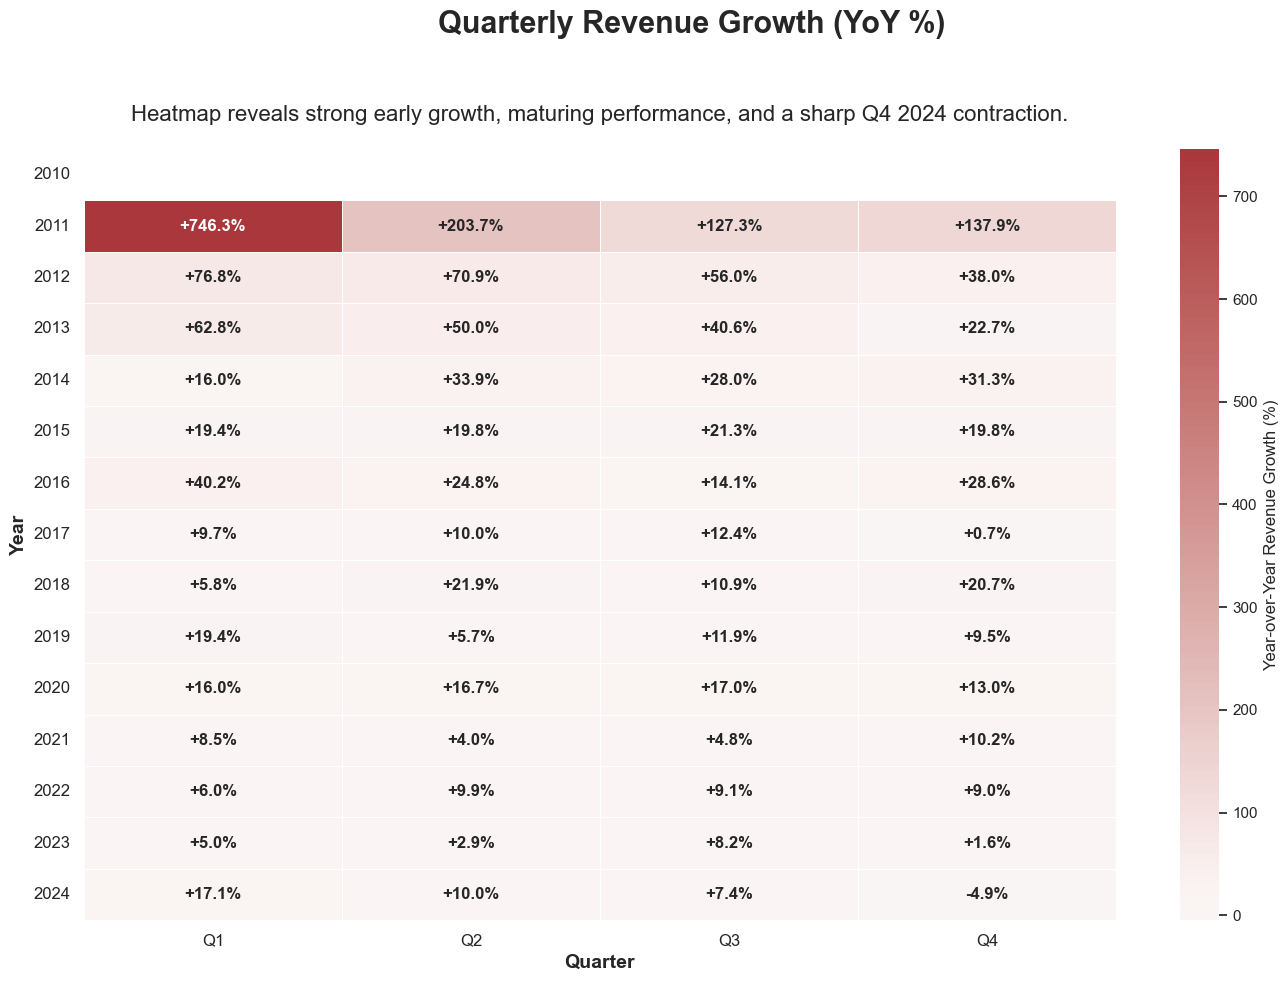

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# --- 1. Data Preparation ---
# Best Practice: Store raw data in a structured format (list of lists/tuples)
# This simulates reading from a file or database without hardcoding strings.
# Column order: Year, Qtr, Rank, Room_Revenue, Rev_YoY_Pct, Bookings, Vol_YoY_Pct, Avg_Lead_Time, Lead_Time_YoY_Chg
data = [
    [2010, 'Q1', '#4', 40449, None, 17, None, 37.5, 37.5],
    [2010, 'Q2', '#3', 124325, None, 58, None, 66.9, 66.9],
    [2010, 'Q3', '#2', 221228, None, 98, None, 125.8, 125.8],
    [2010, 'Q4', '#1', 264638, None, 104, None, 170.3, 170.3],
    [2011, 'Q1', '#4', 342313, 746.3, 149, 776.5, 212.1, 174.6],
    [2011, 'Q2', '#3', 377561, 203.7, 175, 201.7, 249.7, 182.8],
    [2011, 'Q3', '#2', 502945, 127.3, 230, 134.7, 288.6, 162.8],
    [2011, 'Q4', '#1', 629656, 137.9, 266, 155.8, 341.5, 171.1],
    [2012, 'Q1', '#4', 605206, 76.8, 284, 90.6, 389.7, 177.6],
    [2012, 'Q2', '#3', 645404, 70.9, 294, 68.0, 432.3, 182.6],
    [2012, 'Q3', '#2', 784494, 56.0, 371, 61.3, 469.6, 181.0],
    [2012, 'Q4', '#1', 868789, 38.0, 383, 44.0, 522.4, 180.9],
    [2013, 'Q1', '#3', 985509, 62.8, 429, 51.1, 522.7, 133.0],
    [2013, 'Q2', '#4', 968091, 50.0, 452, 53.7, 630.4, 198.1],
    [2013, 'Q3', '#1', 1102627, 40.6, 487, 31.3, 650.6, 181.0],
    [2013, 'Q4', '#2', 1065637, 22.7, 499, 30.3, 717.2, 194.8],
    [2014, 'Q1', '#4', 1143164, 16.0, 518, 20.7, 741.1, 218.4],
    [2014, 'Q2', '#3', 1296369, 33.9, 592, 31.0, 758.8, 128.5],
    [2014, 'Q3', '#1', 1410907, 28.0, 626, 28.5, 833.9, 183.3],
    [2014, 'Q4', '#2', 1399702, 31.3, 638, 27.9, 887.8, 170.5],
    [2015, 'Q1', '#4', 1365341, 19.4, 641, 23.7, 983.4, 242.3],
    [2015, 'Q2', '#3', 1553684, 19.8, 684, 15.5, 992.2, 233.3],
    [2015, 'Q3', '#1', 1711239, 21.3, 775, 23.8, 1020.9, 186.9],
    [2015, 'Q4', '#2', 1677421, 19.8, 761, 19.3, 1055.5, 167.8],
    [2016, 'Q1', '#4', 1913779, 40.2, 831, 29.6, 1107.3, 123.9],
    [2016, 'Q2', '#3', 1938963, 24.8, 847, 23.8, 1145.2, 153.0],
    [2016, 'Q3', '#2', 1951857, 14.1, 918, 18.5, 1210.0, 189.1],
    [2016, 'Q4', '#1', 2157711, 28.6, 964, 26.7, 1274.5, 219.0],
    [2017, 'Q1', '#4', 2099069, 9.7, 960, 15.5, 1346.7, 239.4],
    [2017, 'Q2', '#3', 2131926, 10.0, 995, 17.5, 1367.0, 221.8],
    [2017, 'Q3', '#1', 2194240, 12.4, 1032, 12.4, 1368.1, 158.2],
    [2017, 'Q4', '#2', 2172201, 0.7, 1001, 3.8, 1447.1, 172.6],
    [2018, 'Q1', '#4', 2221283, 5.8, 1042, 8.5, 1525.6, 178.9],
    [2018, 'Q2', '#2', 2598068, 21.9, 1141, 14.7, 1561.2, 194.2],
    [2018, 'Q3', '#3', 2433949, 10.9, 1127, 9.2, 1496.2, 128.1],
    [2018, 'Q4', '#1', 2620863, 20.7, 1191, 19.0, 1615.4, 168.3],
    [2019, 'Q1', '#4', 2652652, 19.4, 1209, 16.0, 1657.4, 131.8],
    [2019, 'Q2', '#2', 2746735, 5.7, 1224, 7.3, 1712.4, 151.2],
    [2019, 'Q3', '#3', 2724287, 11.9, 1264, 12.2, 1756.7, 260.6],
    [2019, 'Q4', '#1', 2870253, 9.5, 1337, 12.3, 1811.8, 196.4],
    [2020, 'Q1', '#4', 3078331, 16.0, 1397, 15.6, 1838.9, 181.5],
    [2020, 'Q2', '#2', 3204669, 16.7, 1432, 17.0, 1923.2, 210.7],
    [2020, 'Q3', '#3', 3187669, 17.0, 1423, 12.6, 1876.8, 120.1],
    [2020, 'Q4', '#1', 3243677, 13.0, 1501, 12.3, 2025.7, 213.9],
    [2021, 'Q1', '#3', 3340343, 8.5, 1504, 7.7, 2041.0, 202.1],
    [2021, 'Q2', '#4', 3333274, 4.0, 1512, 5.6, 2031.6, 108.4],
    [2021, 'Q3', '#2', 3341994, 4.8, 1508, 6.0, 2141.4, 264.5],
    [2021, 'Q4', '#1', 3575990, 10.2, 1620, 7.9, 2104.7, 78.9],
    [2022, 'Q1', '#4', 3539229, 6.0, 1613, 7.2, 2181.1, 140.1],
    [2022, 'Q2', '#2', 3663759, 9.9, 1657, 9.6, 2283.0, 251.4],
    [2022, 'Q3', '#3', 3644639, 9.1, 1685, 11.7, 2364.3, 222.9],
    [2022, 'Q4', '#1', 3896229, 9.0, 1761, 8.7, 2373.9, 269.3],
    [2023, 'Q1', '#4', 3715970, 5.0, 1719, 6.6, 2445.2, 264.1],
    [2023, 'Q2', '#3', 3770760, 2.9, 1734, 4.6, 2486.5, 203.5],
    [2023, 'Q3', '#2', 3944058, 8.2, 1823, 8.2, 2481.3, 117.0],
    [2023, 'Q4', '#1', 3958693, 1.6, 1816, 3.1, 2587.4, 213.5],
    [2024, 'Q1', '#1', 4351688, 17.1, 1950, 13.4, 2525.4, 80.2],
    [2024, 'Q2', '#3', 4147042, 10.0, 1906, 9.9, 2643.0, 156.5],
    [2024, 'Q3', '#2', 4233955, 7.4, 1884, 3.3, 2680.4, 199.1],
    [2024, 'Q4', '#4', 3765568, -4.9, 1690, -6.9, 2729.7, 142.3]
]

columns = [
    'Year', 'Qtr', 'Rank', 'Room_Revenue', 'Rev_YoY_Pct', 'Bookings', 
    'Vol_YoY_Pct', 'Avg_Lead_Time', 'Lead_Time_YoY_Chg'
]

df = pd.DataFrame(data, columns=columns)

# Pivot the data to create a matrix suitable for a heatmap.
# We will visualize the 'Rev_YoY_Pct'.
heatmap_data = df.pivot(index='Year', columns='Qtr', values='Rev_YoY_Pct')

# Create the annotation data in the desired format (e.g., '+12.3%')
# We need to handle the None/NaN values for the first year.
annot_data = heatmap_data.applymap(lambda x: f'{x:+.1f}%' if pd.notna(x) else 'N/A')

# --- 2. Visualization ---
sns.set_theme(style="white")
plt.figure(figsize=(14, 10))

# Create the heatmap
# 'vlag' is a great diverging colormap for showing positive/negative values.
# 'center=0' ensures that 0 is the midpoint of the color scale.
ax = sns.heatmap(
    heatmap_data, 
    annot=annot_data, 
    fmt='s',  # 's' tells seaborn to treat annotations as strings
    cmap='vlag', 
    center=0,
    linewidths=.5,
    cbar_kws={'label': 'Year-over-Year Revenue Growth (%)'},
    annot_kws={"size": 12, "weight": "bold"}
)

# --- 3. Final Touches (Titles and Labels) ---
ax.figure.suptitle('Quarterly Revenue Growth (YoY %)', fontsize=22, fontweight='bold')
ax.set_title(
    'Heatmap reveals strong early growth, maturing performance, and a sharp Q4 2024 contraction.',
    fontsize=16, pad=20
)
ax.set_xlabel('Quarter', fontsize=14, fontweight='bold')
ax.set_ylabel('Year', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12, rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

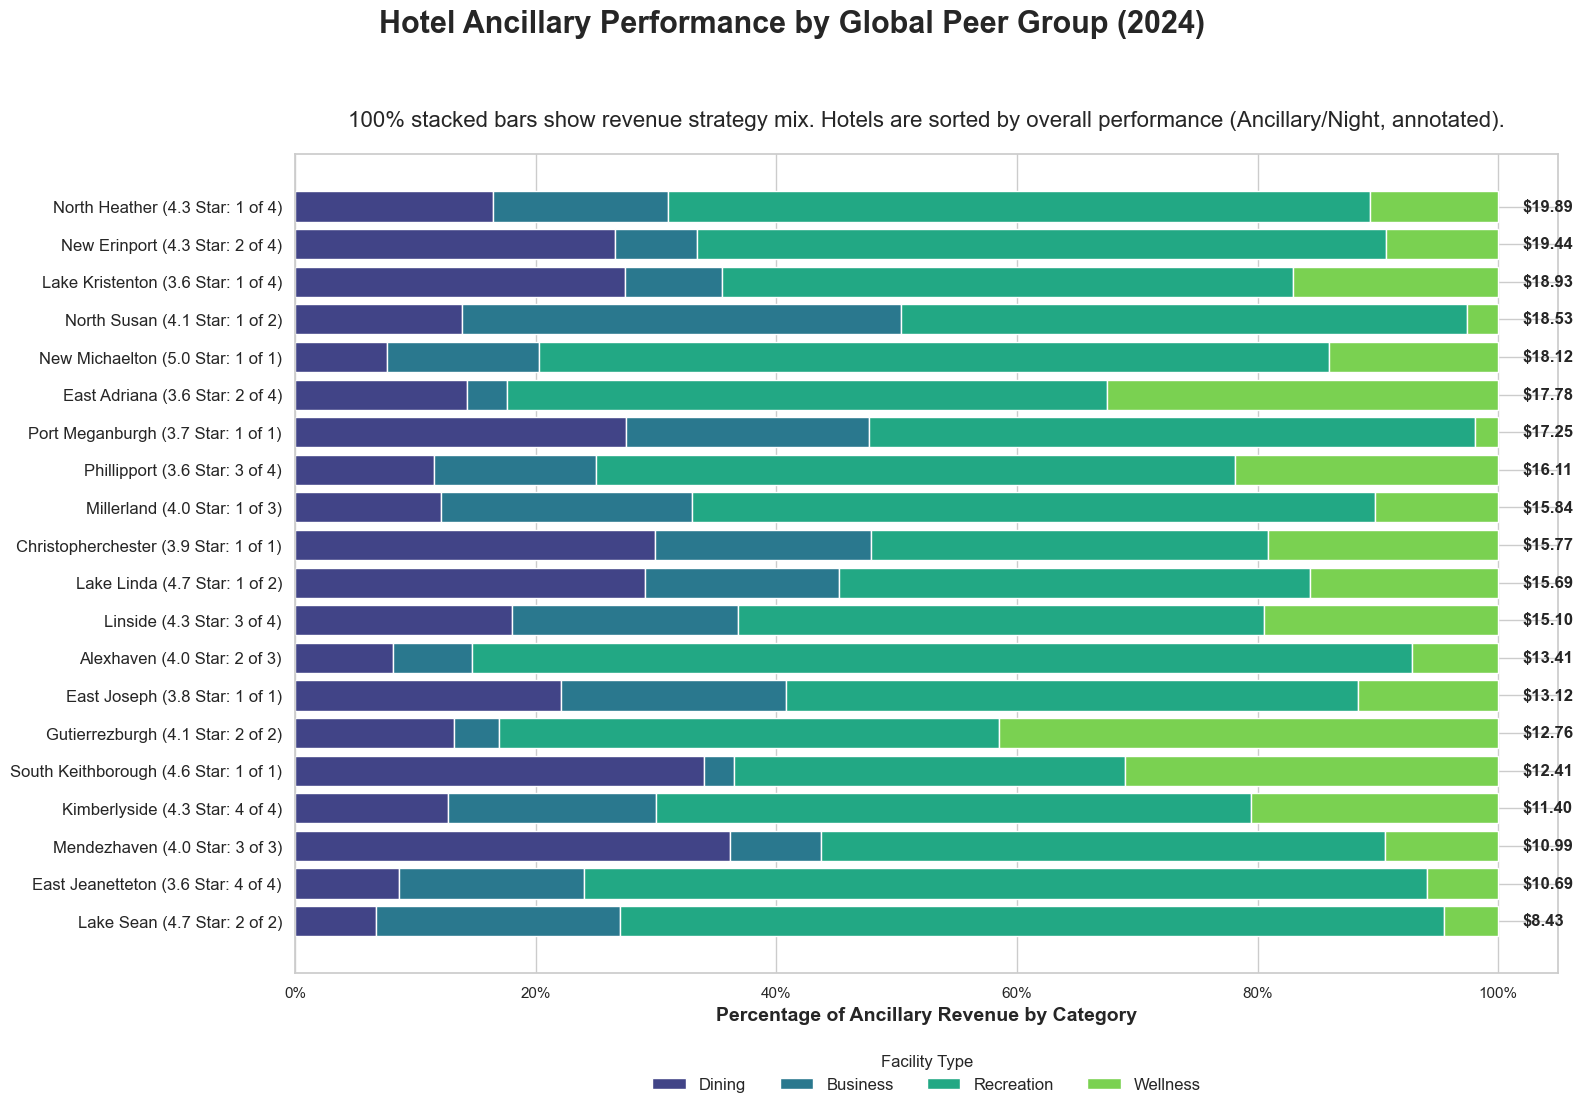

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# --- 1. Data Preparation ---
# Best Practice: Store raw data in a structured format.
# Column order: Global_Peer_Rank, City, Country, Ancillary_per_Night, Dining, Business, Recreation, Wellness
data = [
    ['5.0 Star: 1 of 1', 'New Michaelton', 'Dominican Republic', 18.12, 3804, 6360, 32885, 7029],
    ['4.7 Star: 1 of 2', 'Lake Linda', 'Mexico', 15.69, 13207, 7344, 17791, 7099],
    ['4.7 Star: 2 of 2', 'Lake Sean', 'Marshall Islands', 8.43, 1770, 5349, 18043, 1182],
    ['4.6 Star: 1 of 1', 'South Keithborough', 'Botswana', 12.41, 12753, 925, 12204, 11628],
    ['4.3 Star: 1 of 4', 'North Heather', 'Senegal', 19.89, 9695, 8554, 34300, 6271],
    ['4.3 Star: 2 of 4', 'New Erinport', 'American Samoa', 19.44, 14477, 3704, 31149, 5073],
    ['4.3 Star: 3 of 4', 'Linside', 'Rwanda', 15.10, 7796, 8135, 18927, 8425],
    ['4.3 Star: 4 of 4', 'Kimberlyside', 'Uganda', 11.40, 3942, 5371, 15365, 6385],
    ['4.1 Star: 1 of 2', 'North Susan', 'Saint Kitts and Nevis', 18.53, 6963, 18327, 23603, 1300],
    ['4.1 Star: 2 of 2', 'Gutierrezburgh', 'Gabon', 12.76, 5172, 1462, 16323, 16277],
    ['4.0 Star: 1 of 3', 'Millerland', 'Singapore', 15.84, 5665, 9729, 26547, 4774],
    ['4.0 Star: 2 of 3', 'Alexhaven', 'Kenya', 13.41, 3086, 2482, 29572, 2715],
    ['4.0 Star: 3 of 3', 'Mendezhaven', 'Cameroon', 10.99, 11466, 2402, 14862, 2969],
    ['3.9 Star: 1 of 1', 'Christopherchester', 'Brazil', 15.77, 14219, 8565, 15704, 9116],
    ['3.8 Star: 1 of 1', 'East Joseph', 'Equatorial Guinea', 13.12, 8092, 6877, 17409, 4275],
    ['3.7 Star: 1 of 1', 'Port Meganburgh', 'United Arab Emirates', 17.25, 14161, 10395, 25971, 991],
    ['3.6 Star: 1 of 4', 'Lake Kristenton', 'Mozambique', 18.93, 13952, 4070, 24152, 8660],
    ['3.6 Star: 2 of 4', 'East Adriana', 'Russian Federation', 17.78, 7350, 1715, 25648, 16747],
    ['3.6 Star: 3 of 4', 'Phillipport', 'Heard Island and McDonald Islands', 16.11, 6222, 7242, 28558, 11788],
    ['3.6 Star: 4 of 4', 'East Jeanetteton', 'Italy', 10.69, 2696, 4787, 21807, 1836]
]

columns = ['Global_Peer_Rank', 'City', 'Country', 'Ancillary_per_Night', 'Dining', 'Business', 'Recreation', 'Wellness']
df = pd.DataFrame(data, columns=columns)

# Data processing for 100% stacked bar
categories = ['Dining', 'Business', 'Recreation', 'Wellness']
df['Total_Ancillary'] = df[categories].sum(axis=1)

# Calculate percentages for each category
for category in categories:
    df[f'{category}_pct'] = df[category] / df['Total_Ancillary'] * 100

# Sort the dataframe by the key performance metric for plotting
df_sorted = df.sort_values('Ancillary_per_Night', ascending=True)

# Create a more descriptive label for the y-axis
df_sorted['Label'] = df_sorted['City'] + " (" + df_sorted['Global_Peer_Rank'] + ")"

# --- 2. Visualization ---
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(16, 12))

# Define a color palette
colors = sns.color_palette("viridis", n_colors=len(categories))

# Plot the 100% stacked bars
left = pd.Series(0, index=df_sorted.index)
for i, category in enumerate(categories):
    ax.barh(
        df_sorted['Label'], 
        df_sorted[f'{category}_pct'], 
        left=left, 
        label=category, 
        color=colors[i]
    )
    left += df_sorted[f'{category}_pct']

# --- 3. Annotations and Final Touches ---
# Add annotations for the Ancillary/Night metric
for i, (value, label) in enumerate(zip(df_sorted['Ancillary_per_Night'], df_sorted['Label'])):
    ax.text(102, i, f'${value:.2f}', va='center', ha='left', fontsize=12, fontweight='bold')

# Configure axes and titles
ax.set_xlabel('Percentage of Ancillary Revenue by Category', fontsize=14, fontweight='bold')
ax.set_ylabel('') # Y-axis label is not needed as the hotel labels are descriptive
ax.tick_params(axis='y', labelsize=12)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}%'))

fig.suptitle('Hotel Ancillary Performance by Global Peer Group (2024)', fontsize=22, fontweight='bold')
ax.set_title(
    '100% stacked bars show revenue strategy mix. Hotels are sorted by overall performance (Ancillary/Night, annotated).',
    fontsize=16, pad=20
)

# Add legend
ax.legend(
    title='Facility Type',
    loc='upper center',
    bbox_to_anchor=(0.5, -0.08),
    ncol=len(categories),
    fontsize=12,
    frameon=False
)

fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()